In [1]:
# Konfigurasi Spark
import os
import sys
from pprint import pprint
from matplotlib import pyplot

# 1. Lokasi di mana Spark diinstal
spark_path = "/Users/sani/Kuliah/Sem8/BigData/spark-2.1.0-bin-hadoop2.7"

# 2. Menentukan environment variable
os.environ['SPARK_HOME'] = spark_path


# 3. Download winutils dari https://github.com/steveloughran/winutils/blob/master/hadoop-2.6.0/bin/winutils.exe?raw=true
#   dan letakkan di dalam folder D:\spark\bin\
#   Lokasi winutils.exe
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

#############################################################

# from __future__ import print_function

# $example on$
from numpy import array
from math import sqrt
# $example off$

from pyspark import SparkContext
from pyspark import SparkConf
# $example on$
from pyspark.mllib.clustering import KMeans, KMeansModel
# $example off$

if __name__ == "__main__":
    sc = SparkContext(appName="KMeansExample")  # SparkContext

# The usual preamble
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

/Users/sani/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
requests = pd.read_csv('complete.csv')

/Users/sani/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
requests[:20]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/49 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/04,29.8830556,-97.941111
1,10/10/49 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/05,29.38421,-98.581082
2,10/10/55 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/08,53.2,-2.916667
3,10/10/56 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/04,28.9783333,-96.645833
4,10/10/60 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,21.4180556,-157.803611
5,10/10/61 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/07,36.595,-82.188889
6,10/10/65 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/06,51.434722,-3.180000
7,10/10/65 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/99,41.1175,-73.408333
8,10/10/66 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/09,33.5861111,-86.286111
9,10/10/66 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/05,30.2947222,-82.984167


In [4]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('complete.csv', na_values=na_values)
requests[:20]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/49 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/04,29.8830556,-97.941111
1,10/10/49 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/05,29.38421,-98.581082
2,10/10/55 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/08,53.2,-2.916667
3,10/10/56 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/04,28.9783333,-96.645833
4,10/10/60 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,21.4180556,-157.803611
5,10/10/61 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/07,36.595,-82.188889
6,10/10/65 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/06,51.434722,-3.180000
7,10/10/65 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/99,41.1175,-73.408333
8,10/10/66 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/09,33.5861111,-86.286111
9,10/10/66 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/05,30.2947222,-82.984167


In [5]:
lat = pd.to_numeric(requests['latitude'], errors='coerce').dropna(how='any')
lon = pd.to_numeric(requests['longitude'], errors='coerce').dropna(how='any')
# latlong = pd.concat([lat, lon], axis=1)
latlong=zip(lat,lon)
latlong[:20]

[(29.883055600000006, -97.941111099999986),
 (29.384209999999996, -98.581081999999995),
 (53.200000000000003, -2.9166669999999999),
 (28.978333299999999, -96.645833299999993),
 (21.418055600000002, -157.80361110000001),
 (36.594999999999999, -82.188888900000009),
 (51.434722000000001, -3.1800000000000002),
 (41.1175, -73.408333299999995),
 (33.586111100000004, -86.286111099999985),
 (30.294722200000002, -82.984166700000003),
 (33.916388899999994, -118.35166670000001),
 (35.233333299999998, -82.734444400000001),
 (40.668611100000007, -73.527500000000003),
 (37.153611100000006, -83.761944400000004),
 (35.8238889, -80.253611099999986),
 (36.843055600000007, -83.321944400000007),
 (42.537777800000001, -83.2330556),
 (41.325277800000002, -72.193611099999998),
 (32.364167000000002, -64.678611000000004),
 (42.391666700000002, -71.566666699999999)]

In [6]:
latlong=sc.parallelize(latlong)

In [7]:
    # Build the model (cluster the data)
    clusters = KMeans.train(latlong,4, maxIterations=100, initializationMode="random")
    
    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = latlong.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))

    # Save and load model
#     clusters.save(sc, "target/org/apache/spark/PythonKMeansExample/KMeansModel")
#     sameModel = KMeansModel.load(sc, "target/org/apache/spark/PythonKMeansExample/KMeansModel")
#     # $example off$

#     sc.stop()

Within Set Sum of Squared Error = 909924.245009


In [8]:
clusterdata=latlong.map(lambda point: clusters.predict(point))
clusterdata.take(15)

[3, 3, 1, 3, 0, 2, 1, 2, 3, 2, 0, 2, 2, 2, 2]

In [9]:
X = latlong.collect()

In [10]:
label = clusterdata.collect()

[array([  39.89948583, -119.43535785]), array([ 32.3170884 ,  37.79472297]), array([ 37.99720133, -78.11572522]), array([ 37.67517536, -93.79967615])]


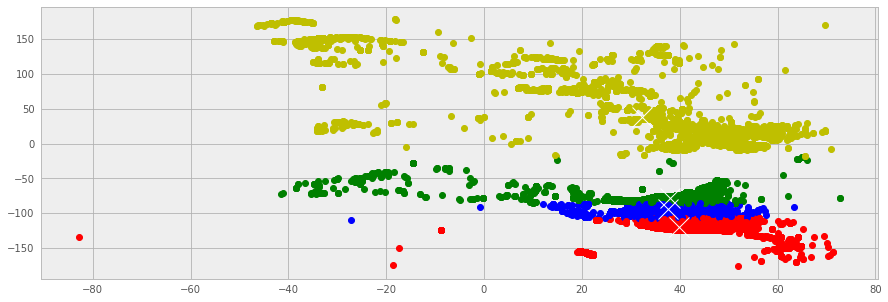

In [11]:
for point in range(len(label)):
    if (label[point]==0):
        color = "r";
    elif (label[point]==1):
        color = "y"
    elif (label[point]==2):
        color = "g"
    else:
        color = "b";
    lines = plt.plot(X[point][0], X[point][1], 'ro')
    plt.setp(lines, color=color, linewidth=2.0)
    center = clusters.clusterCenters
print center
for centroid in range(len(center)):
    lines = plt.plot(center[centroid][0],center[centroid][1],'bx')
    plt.setp(lines, color='w', markersize=20)
plt.show()